In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pickle import dump

In [3]:
# Load data
df_train = pd.read_csv('../data/processed/df_train.csv')
df_test = pd.read_csv('../data/processed/df_test.csv')

In [4]:
# Machine Learning
X_train = df_train.drop(columns='compressive_strength')
y_train = df_train['compressive_strength']

X_test = df_test.drop(columns='compressive_strength')
y_test = df_test['compressive_strength']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((927, 9), (103, 9), (927,), (103,))

In [5]:
reg_knn = Pipeline(steps=[
    ('proc', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

reg_knn.fit(X_train, y_train)

,steps,"[('proc', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [6]:
y_hat = reg_knn.predict(X_test)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
print(f'R2: {r2_score(y_test, y_hat):.2f}')

RMSE: 6.58
R2: 0.83


In [7]:
reg_knn_cv = GridSearchCV(
    reg_knn,
    param_grid={
        'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    },
    cv=5
)

reg_knn_cv.fit(X_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'knn__n_neighbors': [3, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [8]:
y_hat = reg_knn_cv.predict(X_test)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_hat)):.2f}')
print(f'R2: {r2_score(y_test, y_hat):.2f}')

RMSE: 6.14
R2: 0.85


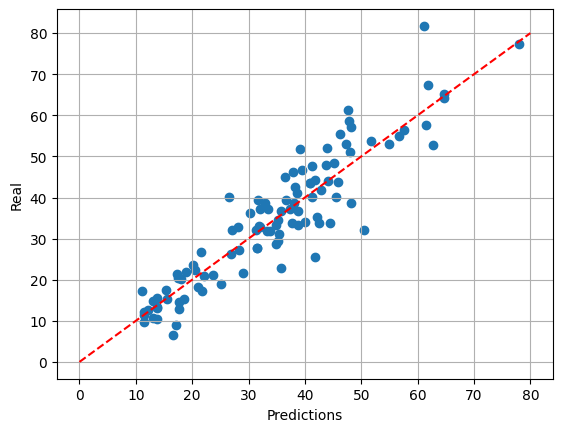

In [9]:
plt.scatter(x=y_hat, y=y_test)
plt.grid(True)
plt.xlabel('Predictions')
plt.ylabel('Real')
plt.plot([0, 80], [0, 80], c='r', linestyle='--', )
plt.show()

In [11]:
# Save model
dump(reg_knn_cv, open('../models/reg_knn_cv.pkl', 'wb'))

In [27]:
import random

random_values = {
    col: random.uniform(df_train[col].min(), df_train[col].max())
    for col in df_train.columns
}

prediction = pd.DataFrame([random_values])
prediction

,Unnamed: 0,cement,blast_furnance_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,compressive_strength,log_age
0,227.656256,176.30965,93.087931,49.810651,238.401415,21.959036,934.459844,971.287191,68.830548,3.148318
